# Bài thực hành Lab02 - Nhập môn Máy học - Logistic Regression
Họ và tên: Huỳnh Quang Trung\
MSSSV: 20280108\
Lớp: 20TH_KDL\
Bài làm được thực hiện trên Google Colab

------

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [ ]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
PATH = "/content/drive/MyDrive/NMMH/Tuan2/heart.csv"
df = pd.read_csv(PATH)

## Data Analysis

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


In [ ]:
print(f'Bộ dữ liệu có {df.shape[0]} dòng và {df.shape[1]} cột')

Bộ dữ liệu có 886 dòng và 14 cột


Đây là một bộ dữ liệu có 886 bản ghi, chứa các thông tin như tuổi, giới tính, các chỉ số sức khỏe cần thiết và được dùng trong việc dự đoán 1 bệnh nhân nào đó có hay không việc mắc bệnh tim. Có 13 thuộc tính và 1 cột target trong bộ dữ liệu.

In [ ]:
# Trích tên của các cột mang kiểu dữ liệu continuous và categorical
continuous_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Ta thấy bộ dữ liệu không có các giá trị Null hay NaN, có lẽ đây là bộ dữ liệu đã được xử lý từ trước.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,886.0,54.007901,9.126292,29.0,47.0,54.0,60.0,77.0
sex,886.0,0.683973,0.465186,0.0,0.0,1.0,1.0,1.0
cp,886.0,1.005643,1.024542,0.0,0.0,1.0,2.0,3.0
trestbps,886.0,132.117381,16.807511,94.0,120.0,130.0,140.0,200.0
chol,886.0,247.497743,47.209995,126.0,212.0,245.0,274.0,564.0
fbs,886.0,0.168172,0.374230,0.0,0.0,0.0,0.0,1.0
restecg,886.0,0.495485,0.526669,0.0,0.0,0.0,1.0,2.0
thalach,886.0,149.492099,23.921327,71.0,133.0,153.0,166.0,206.0
exang,886.0,0.310384,0.462912,0.0,0.0,0.0,1.0,1.0
oldpeak,886.0,1.083296,1.147935,0.0,0.0,0.8,1.8,6.2


Dựa vào các số liệu thống kê ở phía trên thì ta thấy tất cả các cột có kiểu dữ liệu dạng continuous đều đã nằm trong khoảng giá trị đúng như thông tin mô tả. Có 2 cột là `ca` và `thal` có khoảng giá trị vượt ra khỏi quy định, cụ thể là 0-4 và 0-3. Ta sẽ xử lý vấn đề này ở phần preprocessing.

### Kiểm tra xem các lớp trong dữ liệu có cân bằng với nhau hay không

In [ ]:
df.target.value_counts()

1    500
0    386
Name: target, dtype: int64

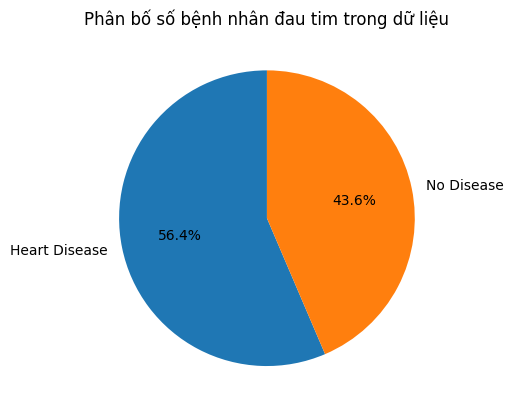

In [ ]:
counts = df['target'].value_counts()
values = [counts[1], counts[0]]
labels = ['Heart Disease', 'No Disease']
plt.pie(values, labels=labels, startangle=90, autopct='%1.1f%%')
plt.title('Phân bố số bệnh nhân đau tim trong dữ liệu')
plt.show()

Có 56.4% bản ghi là các bệnh nhân mắc bệnh tim và 43.6% là người bình thường. Đây là một bộ dữ liệu tương đối cân bằng giữa 2 lớp.

### Số lượng các giới tính trong tập dữ liệu.

In [ ]:
df.sex.value_counts()

1    606
0    280
Name: sex, dtype: int64

Ta thấy, số lượng bản ghi của giới tính nữ nhiều hơn giới tính nam.

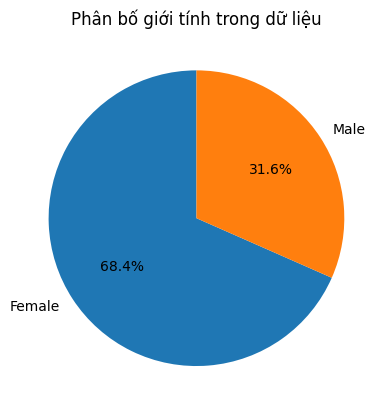

In [ ]:
counts = df['sex'].value_counts()
values = [counts[1], counts[0]]
labels = ['Female', 'Male']
plt.pie(values, labels=labels, startangle=90, autopct='%1.1f%%')
plt.title('Phân bố giới tính trong dữ liệu')
plt.show()

Một bất ngờ nhỏ, phần lớn giới tính trong tập dữ liệu là nữ. Thông thường, nam giới sẽ có nguy cơ mắc bệnh tim cao hơn nữ giới vì nhiều thói quen sinh hoạt không tốt cũng như do những yếu tố như hormone, gen di truyền...


### Giữa nam và nữ thì giới tính nào mắc bệnh tim nhiều hơn?

Tiếp theo, ta sẽ xem giữa nam và nữ thì giới tính nào có số lượng bệnh nhân mắc bệnh tim nhiều hơn

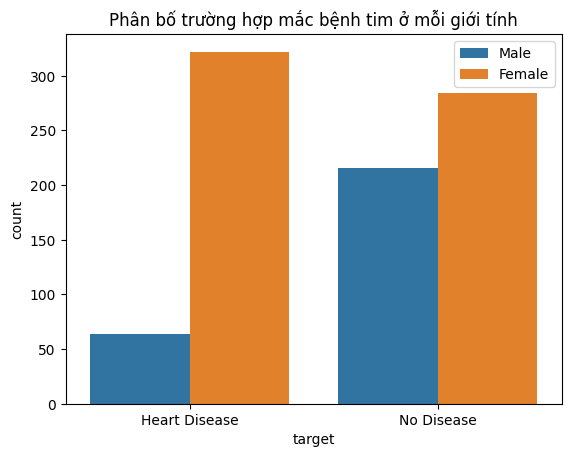

In [ ]:
fig = sns.countplot(x = 'target', data = df, hue = 'sex')
fig.set_xticklabels(labels=['Heart Disease', 'No Disease'], rotation=0)
plt.legend(['Male', 'Female'])
plt.title('Phân bố trường hợp mắc bệnh tim ở mỗi giới tính');

Ta thấy số lượng nam giới khỏe mạnh là rất lớn so với số trường hợp mặc bệnh tim, hơn 200 bản ghi.\
Trong khi đó, số lượng nữ giới mắc bệnh tim là hơn 300 trường hợp và con số này ở nam giới chỉ là hơn 50 trường hợp.

### Xem phân phối của các cột Continuous

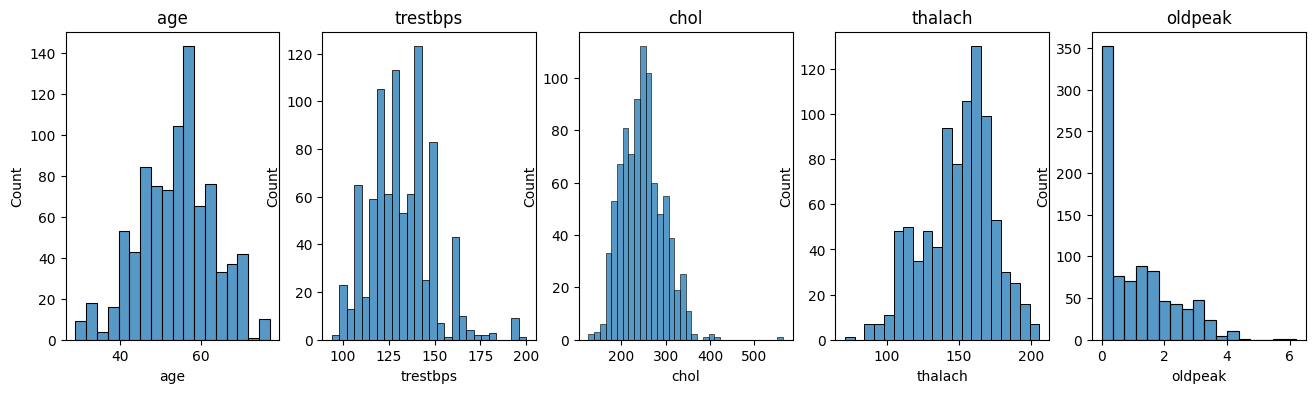

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_col), figsize=(16, 4))

for i, col in enumerate(continuous_col):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

plt.show()

Ta thấy ở các biến continuous thì chúng có vẻ tuân theo phân phối chuẩn (age, trestbps, chol, thalach). Điều này có thể giúp mô hình cải thiện việc học các mối quan hệ giữa các feature và dự đoán kết quả được chính xác hơn, giúp mô hình tránh được việc vướng vào các giá trị nhiễu và không thể học được các mẫu chính xác.\
Ở cột oldpeak thì phân phối bị lệch phải => có thể dùng StandardScaler để chuẩn hóa về dạng phân phối chuẩn.

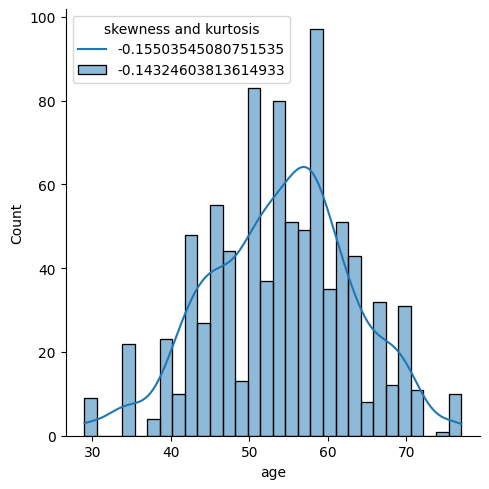

In [ ]:
sns.displot( x = 'age', data = df, bins = 30, kde = True)
skewness=str(df['age'].skew())
kurtosis=str(df['age'].kurt())
plt.legend([skewness,kurtosis],title=('skewness and kurtosis'))
plt.show();

Dựa và biểu đồ phân phối của cột `age` phía trên thì ta cũng có nhận xét được rằng hầu hết các bản ghi là của các bệnh nhân từ 50 đến 60 tuổi. Đây cũng là độ tuổi dễ bị mắc các bệnh về tim mạch.

### Sự liên quan giữa mức độ đau ngực và mắc bệnh tim

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,304,95
1,17,129
2,58,220
3,7,56


Ta thấy, các bệnh nhân có mức độ đau ngực là 3 thì tỉ lệ mắc bệnh tim cao hơn với tỉ lệ xấp xỉ 0.89% trong tổng số các bệnh nhân mắc phải. Tiếp theo đó là mức độ 1 với 0.88% và mức độ 2 với 0.79%. Cuối cùng là mức độ 0 với xấp xỉ 0.24%. Nhưng phần lớn các bệnh nhân khi mắc bệnh tim sẽ có mức độ đau ngực ở mức thứ 1 và thứ 2.

Có 95 bệnh nhân tuy không có triệu chứng đau ngực nhưng vẫn mắc bệnh tim.

### Xem qua tuổi và nhịp tim của các bẹnh nhân mắc bệnh tim.

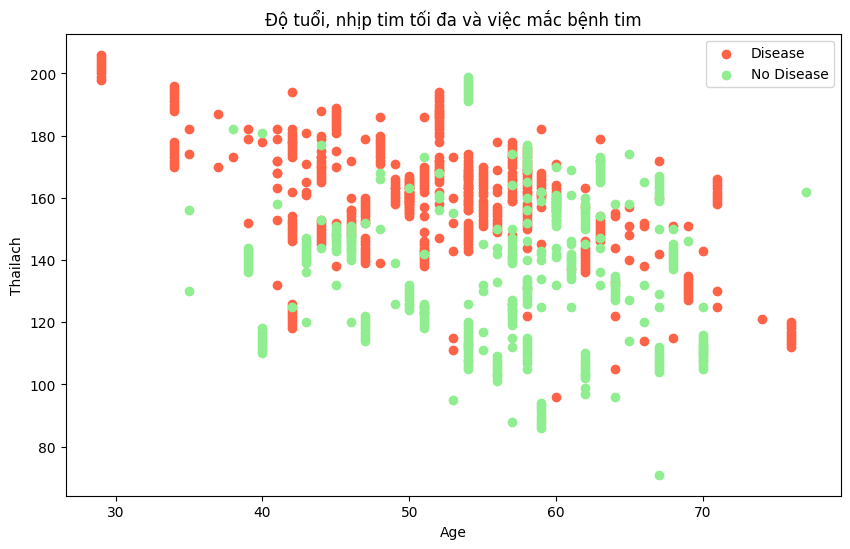

In [ ]:
plt.figure(figsize=(10,6))


plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c='tomato')

plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c='lightgreen')

plt.title('Độ tuổi, nhịp tim tối đa và việc mắc bệnh tim')
plt.xlabel('Age')
plt.legend(['Disease', 'No Disease'])
plt.ylabel('Thailach');

Đa số các bệnh nhân không mắc bệnh tim đều có nhịp tim tối đa nằm trong khoảng từ 90 cho tới dưới 180. Trong khi đó các bệnh nhân mắc bệnh tim phần lớn đều có nhịp tim tối đa nằm trong khoảng 140 cho đến dưới 200. Và độ tuổi mắc bệnh thường là từ 50 đến 60.\
Điều này là dễ hiểu khi nhịp tim càng cao thì sẽ dễ mắc các bệnh về huyết áp và tim mạch.

Text(13.819444444444445, 0.5, 'Số lượng người mắc bệnh')

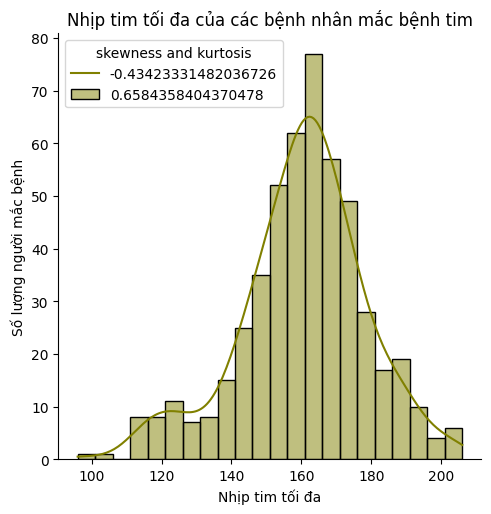

In [ ]:
sns.displot(x = df.thalach[df.target==1], data = df, kde = True, color= 'olive')
skewness=str(df.thalach[df.target==1].skew())
kurtosis=str(df.thalach[df.target==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title('Nhịp tim tối đa của các bệnh nhân mắc bệnh tim')
plt.xlabel('Nhịp tim tối đa')
plt.ylabel('Số lượng người mắc bệnh')

Phần lớn các bệnh nhân đau tim thường có nhịp tim tối đa từ 160 cho đến 170.

### Xem qua Cholesterol, Age và việc mắc bệnh tim.

Text(0, 0.5, 'Cholesterol')

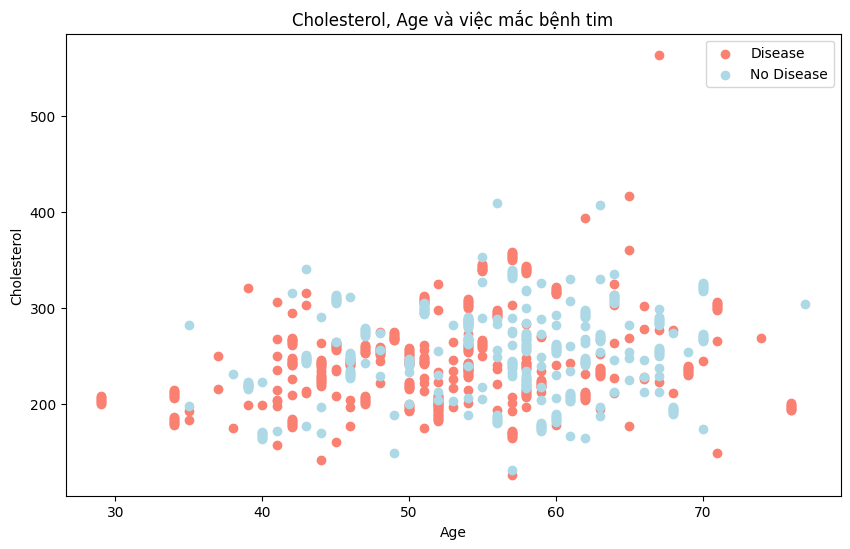

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], 
            df.chol[df.target==1], 
            c="salmon")

plt.scatter(df.age[df.target==0], 
            df.chol[df.target==0], 
            c="lightblue")

plt.title('Cholesterol, Age và việc mắc bệnh tim')
plt.xlabel('Age')
plt.legend(['Disease', 'No Disease'])
plt.ylabel('Cholesterol')

Ta thấy phân bố về nồng độ Cholesterol ở các bệnh nhân mắc bệnh và không mắc bệnh khá tương đồng với nhau, không có sự khác biệt cụ thể. Có lẽ việc mắc bệnh tim không quá phụ thuộc vào nồng độ Choesterol ở các bệnh nhân này.

## Preprocessing

In [ ]:
def unique_values(df, columns):
    unique_dict = {}
    for col in columns:
        unique_dict[col] = df[col].unique()
    return unique_dict

In [ ]:
unique_values(df, categorical_col)

{'sex': array([1, 0]),
 'cp': array([0, 1, 2, 3]),
 'fbs': array([0, 1]),
 'restecg': array([0, 1, 2]),
 'exang': array([0, 1]),
 'slope': array([2, 0, 1]),
 'ca': array([0, 2, 1, 3, 4]),
 'thal': array([3, 2, 1, 0]),
 'target': array([0, 1])}

Theo mô tả của tập dữ liệu ở đầu notbook thì cột `ca` chỉ chứa các giá trị từ 0-3, tuy nhiên ở trên ta thấy hiện giờ cột `ca` có giá trị từ 0-4.

In [ ]:
df.ca.value_counts()

0    535
1    153
2    126
3     60
4     12
Name: ca, dtype: int64

**Có 12 dòng dữ liệu có giá trị là 4, tại đây ta quyết định sẽ thay thế các giá trị sai này thành NaN trong phần preprocessing.**

Tương tự, theo mô tả của tập dữ liệu thì cột `thal` chỉ chứa các giá trị 0, 1, 2 nhưng trong tập dữ liệu lại có thêm giá trị 3.

In [ ]:
df.thal.value_counts()

2    533
3    301
1     50
0      2
Name: thal, dtype: int64

**Có tới 301 dòng dữ liệu mang giá trị 3, vì thế ta cũng quyết định thay các giá trị 3 này thành NaN ở phần preprocessing.**

### Kiểm tra các dòng trùng nhau

In [ ]:
duplicated = df.duplicated().sum()
duplicated

0

Trong tập dữ liệu không có dòng nào là trùng nhau.

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    preprocessed_df = df.copy()
    # preprocess data
    preprocessed_df.loc[preprocessed_df['ca'] == 4, 'ca'] = np.NaN
    preprocessed_df.loc[preprocessed_df['thal'] == 3, 'thal'] = np.NaN
    # Fill cac gia tri NaN bang mode cua cot tuong ung
    preprocessed_df = preprocessed_df.fillna(preprocessed_df.mode().iloc[0])
    return preprocessed_df

In [ ]:
preprocessed_df = preprocessing_data(df)

In [ ]:
preprocessed_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
unique_values(preprocessed_df, categorical_col)

{'sex': array([1, 0]),
 'cp': array([0, 1, 2, 3]),
 'fbs': array([0, 1]),
 'restecg': array([0, 1, 2]),
 'exang': array([0, 1]),
 'slope': array([2, 0, 1]),
 'ca': array([0., 2., 1., 3.]),
 'thal': array([2., 1., 0.]),
 'target': array([0, 1])}

Các cột categorical đã nằm trong khoảng giá trị đúng của chúng.

## Feature Engineering

Trong tập dữ liệu này, các biến dạng categorical đã được biển diễn sẵn dưới dạng numerical, vì vậy ở phần feature engineering này ta sẽ giữ nguyên dataframe, cũng như giữ nguyên các feature đã có để đưa vào model.

<Axes: >

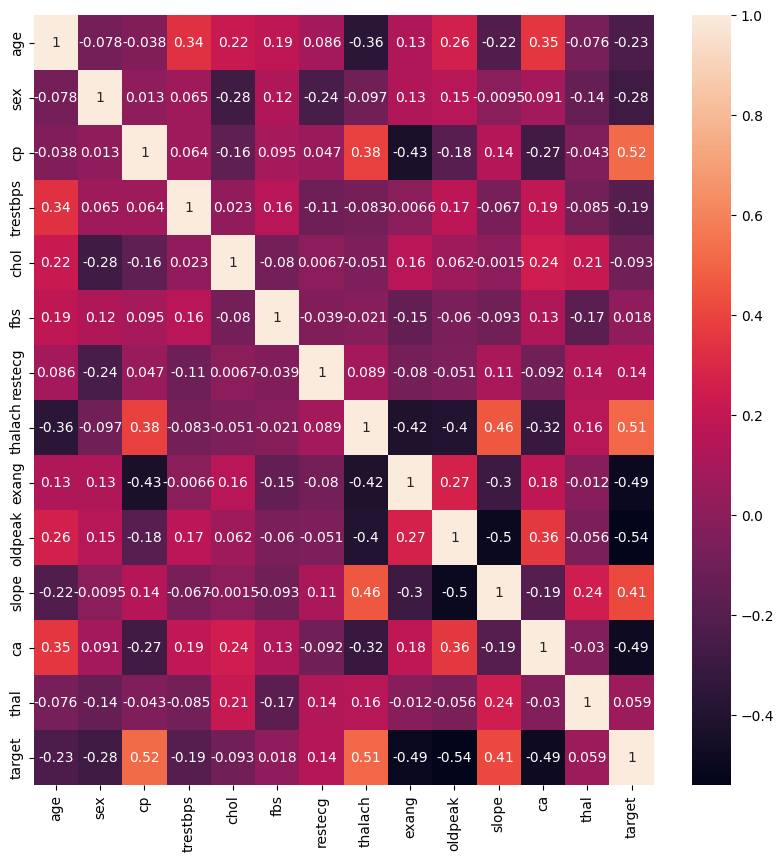

In [ ]:
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Normalize your data
    feature_engineered_df = df.copy()
    return feature_engineered_df

feature_engineered_df = apply_feature_engineering(preprocessed_df)
plt.figure(figsize=(10,10), facecolor='white')
sns.heatmap(feature_engineered_df.corr(), annot=True) # Show heatmap after normalized data

Ta thấy có các feature có độ tương quan mạnh với target như:
- `cp` với độ tương quan 0.52
- `thalach` với độ tương quan 0.51
- `slope` với độ tương quan là 0.41


Ngoài ra, còn có các cột có độ tương quan nghịch với target như: 
- `exang` với độ tương quan -0.49
- `oldpeak` với độ tương quan -0.54
- `ca` với độ tương quan -0.49

Các cột có độ tương quan mạnh rất có thể là những feature đóng góp lớn vào hiệu suất của mô hình.

In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    X = df.drop('target', axis = 1, inplace = False).values
    y = df['target']
    return X, y

X, y = prepare_X_y(feature_engineered_df)

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2002
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [ ]:
print('Training:' + str(trainX.shape))
print('Test:' + str(testX.shape))

Training:(620, 13)
Test:(266, 13)


## Sử dụng Logistic Regression và tìm ra tham số solver và penalty tốt nhất.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### Sử dụng Logistic Regression

Đầu tiên, ta sẽ sử dụng Logistic Regression với các tham số mặc định của thư viện scikit-learn

In [ ]:
def build_default_model(X, y):
  model = LogisticRegression()
  model.fit(X, y)
  return model

model = build_default_model(trainX, trainY)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.score(testX, testY)

0.9285714285714286

Với các tham số mặc định thì ta thu về được accuracy trên tập train là 0.9285714285714286

Sử dụng StandardScaler để scalling data trước khi train model.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(trainX)
X_test_scaled = scaler.transform(testX)

In [ ]:
model_scaled = build_default_model(X_train_scaled, trainY)
model_scaled.score(X_test_scaled, testY)

0.9398496240601504

Ta thấy sau khi đã scale dữ liệu với Standard trước khi train model cho ra kết quả với accuracy tốt hơn với 0.9398496240601504

Standard Scaler là một phương pháp chuẩn hóa dữ liệu trong Machine Learning. Nó được sử dụng để chuẩn hóa các features của tập dữ liệu thành các giá trị có trung bình bằng 0 và độ lệch chuẩn bằng 1.

### Tìm ra bộ tham số solver và penalty tốt nhất.

Bây giờ ta sẽ tiến hành thử các tham số solver và penalty khác nhau để tìm ra bộ tham số tốt nhất cho model với dữ liệu đã được Standard scalling.

Theo tài liệu của Scikit-learn thì tham số `solver` là phương pháp để giải bài toán tối ưu đối với cross entropy. Trong đó có: 
- Các tham số `lbfgs`, `liblinear`, `newton-cg`, `newton-cholesky`, `sag`, `saga`. 
- Đối với dữ liệu kích thước nhỏ thì `liblinear` sử dụng sẽ phù hợp hơn. Trái lại `sag`, `saga` có tốc độ huấn luyện nhanh hơn cho dữ liệu lớn.
- `liblinear` là một thuật toán tối ưu hóa dùng trong máy học để giải quyết bài toán phân loại nhị phân và đa lớp. Tuy nhiên, `liblinear` chỉ hỗ trợ cho các phương pháp phân loại "one-versus-rest" (OVR), nghĩa là phân loại các lớp một cách độc lập với nhau bằng cách đối chiếu từng lớp với tất cả các lớp còn lại.
- `newton-cholesky` Là một sự lựa chọn tốt đối với các bài toán có số lượng mẫu dữ liệu lớn hơn số lượng đặc trưng, đặc biệt là khi có các đặc trưng phân loại one-hot với các nhóm hiếm. Tuy nhiên, `newton-cholesky` chỉ hỗ trợ phương pháp phân loại "one-versus-rest" (OVR) để giải quyết bài toán phân loại đa lớp.
- Khi dùng solver là `sag`, `saga` hoặc `liblinear`, thì cần phải dùng thêm một tham số khác là `random_rate` để trộn data.

`penalty`: là tham số dạng hàm được sử dụng làm thành phần điều chuẩn (regularization term). Trong đó:
- `None`: Không sử dụng penalty.

- `l2`: Đây là tham số mặc định cho penalty và nó sử dụng chuẩn L2 cho thành phần điều chuẩn.

- `l1`: Sử dụng chuẩn L1 cho thành phần điều chuẩn.

- `elasticnet`: Sử dụng cả L1 và L2 cho thành phần điều chuẩn, khi sử dụng tham số này cũng cần phải khai báo 1 tham số khác, đó là `l1_ratio`

Một số `solver` chỉ có thể hoạt động với các tham số `penalty`, cụ thể như sau:
- `lbfgs` chỉ hoạt động với `[l2, None]`

- `liblinear` chỉ hoạt động với `[l1, l2]`

- `newton-cg` chỉ hoạt động với `[l2, None]`

- `newton-cholesky` chỉ hoạt động với `[l2, None]`

- `sag` chỉ hoạt động với `[l2, None]`

- `saga` chỉ hoạt động với `[elasticnet, l1, l2, None]`

### Thử Logistic Regression với các tham số solver và penalty khác nhau.

In [ ]:
# Hàm biuld các model Logistic khác nhau tùy theo tham số truyền vào
def build_sample_model(X, y, penalty, solver, random_state=None):
  model = LogisticRegression(penalty = penalty, solver = solver, random_state = random_state)
  model.fit(X, y)
  return model

#### Mô hình Logistic Regression với tham số `solver = 'lbfgs'` và `penalty = ['l2', None]`



In [ ]:
penalties = ['l2', None]
for i in penalties:
  model = build_sample_model(X = X_train_scaled, y = trainY, penalty = i, solver = 'lbfgs')
  print(f'Model with penalty = {i} and solver = lbfgs: {model.score(X_test_scaled, testY)}')

Model with penalty = l2 and solver = lbfgs: 0.9398496240601504
Model with penalty = None and solver = lbfgs: 0.9398496240601504


#### Mô hình Logistic Regression với tham số `solver = 'liblinear'` và `penalty = [l1', 'l2'], random_state = 2002`


In [ ]:
penalties = ['l1', 'l2']
for i in penalties:
  model = build_sample_model(X = X_train_scaled, y = trainY, penalty = i, solver = 'liblinear', random_state = 2002)
  print(f'Model with penalty = {i} and solver = liblinear: {model.score(X_test_scaled, testY)}')

Model with penalty = l1 and solver = liblinear: 0.9398496240601504
Model with penalty = l2 and solver = liblinear: 0.9398496240601504


#### Mô hình Logistic Regression với tham số `solver = 'newton-cg'` và `penalty = ['l2', None]`


In [ ]:
penalties = ['l2', None]
for i in penalties:
  model = build_sample_model(X = X_train_scaled, y = trainY, penalty = i, solver = 'newton-cg')
  print(f'Model with penalty = {i} and solver = newton-cg: {model.score(X_test_scaled, testY)}')

Model with penalty = l2 and solver = newton-cg: 0.9398496240601504
Model with penalty = None and solver = newton-cg: 0.9398496240601504


#### Mô hình Logistic Regression với tham số `solver = 'newton-cholesky'` và `penalty = ['l2', None]`


In [ ]:
penalties = ['l2', None]
for i in penalties:
  model = build_sample_model(X = X_train_scaled, y = trainY, penalty = i, solver = 'newton-cholesky')
  print(f'Model with penalty = {i} and solver = newton-cholesky: {model.score(X_test_scaled, testY)}')

Model with penalty = l2 and solver = newton-cholesky: 0.9398496240601504
Model with penalty = None and solver = newton-cholesky: 0.9398496240601504


#### Mô hình Logistic Regression với tham số `solver = 'sag'` và `penalty = ['l2', None], random_state = 2002`

In [ ]:
penalties = ['l2', None]
for i in penalties:
  model = build_sample_model(X = X_train_scaled, y = trainY, penalty = i, solver = 'sag', random_state = 2002)
  print(f'Model with penalty = {i} and solver = sag: {model.score(X_test_scaled, testY)}')

Model with penalty = l2 and solver = sag: 0.9398496240601504
Model with penalty = None and solver = sag: 0.9398496240601504


#### Mô hình Logistic Regression với tham số `solver = 'saga'` và `penalty = ['l1', 'l2', None, 'elasticnet'], random_state = 2002`


In [ ]:
penalties = ['l1', 'l2', None]
for i in penalties:
  model = build_sample_model(X = X_train_scaled, y = trainY, penalty = i, solver = 'saga', random_state = 2002)
  print(f'Model with penalty = {i} and solver = saga: {model.score(X_test_scaled, testY)}')

Model with penalty = l1 and solver = saga: 0.943609022556391
Model with penalty = l2 and solver = saga: 0.9398496240601504
Model with penalty = None and solver = saga: 0.9398496240601504


In [ ]:
model = LogisticRegression(penalty='elasticnet', solver = 'saga', l1_ratio = 0.5, random_state = 2002)
model.fit(X_train_scaled, trainY)
print(f'Model with penalty = elasticnet, solver = saga and l1_ratio = 0.5: {model.score(X_test_scaled, testY)}')

Model with penalty = elasticnet, solver = saga and l1_ratio = 0.5: 0.9398496240601504


Sau khi thử hết tất cả các tham số, thì ta nhận thấy phần lớn các mô hình cho ra kết quả đều giống nhau. Riêng với model được train bằng tham số `penalty = l1` và `solver = saga` là cho ra kết quả cao nhất với `0.943609022556391`.\
Đây cũng là mô hình có accuracy tốt nhất từ đầu đến giờ.

Vậy ta quyết định sẽ chọn tham số  `penalty = l1` và `solver = saga` để xây mô hình Logistic Regression cuối cùng.



## Build SK-learn model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Tại bước này, ta sẽ train 1 mô hình Logistic Regression với các tham số tốt nhất đã được tìm ra phía trên.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    # Input scaler and logistic model into pipeline
    model = Pipeline(steps=[
        ('scaler', StandardScaler()), 
        ('log_model', LogisticRegression(penalty = 'l1', solver = 'saga', random_state = 2002))])
    # Fit model with X, y
    model.fit(X, y)
    return model

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    #Return error value like accuracy, f1score, ...
    print("precision", precision_score(y_true , y_pred))
    print("recall", recall_score(y_true , y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true , y_pred))

    # Return F1-score, it is my main error
    main_score = f1_score(y_true , y_pred)
    return main_score

model = build_model(trainX, trainY)

# Compare on training dataset
train_pred = model.predict(trainX)
print("Training performance:", calculate_performance(trainY, train_pred))
print()
# Compare on testing dataset
test_pred = model.predict(testX)
print("Testing performance:", calculate_performance(testY, test_pred))

precision 0.931129476584022
recall 0.9575070821529745
accuracy 0.9354838709677419
F1 0.9441340782122905
Training performance: 0.9441340782122905

precision 0.9285714285714286
recall 0.9727891156462585
accuracy 0.943609022556391
F1 0.9501661129568106
Testing performance: 0.9501661129568106


In [ ]:
print(model.named_steps['log_model'].coef_)
print()
print(model.named_steps['log_model'].intercept_)

[[ 0.24431748 -1.37106711  1.44382516 -0.88676026 -0.36036284  0.38376366
   0.18212177  0.8726406  -0.80014461 -1.11234268  0.88345256 -1.61713879
  -0.30665405]]

[0.18764407]


Các hệ số hồi quy ở phía trên cho thấy các cột đã có sự tương quan mạnh với target thì cho ra các hệ số lớn hơn, có ảnh hưởng đến kết quả dự đoán nhiều hơn các feature còn lại.

In [ ]:
print("Confusion matrix: \n", confusion_matrix(testY , test_pred))
print("Classification report: \n", classification_report(testY , test_pred))

Confusion matrix: 
 [[108  11]
 [  4 143]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       119
           1       0.93      0.97      0.95       147

    accuracy                           0.94       266
   macro avg       0.95      0.94      0.94       266
weighted avg       0.94      0.94      0.94       266



Đây là bài toán phân loại và dự đoán một bệnh nhân nào đó có mắc bệnh đau tim hay là không, và trong trường hợp này, việc cố gắng phát hiện ra hết các bệnh nhân đau tim là hết sức quan trọng. Chúng ta cần phải xây dựng được một mô hình tìm ra các bệnh nhân bị bệnh càng nhiều càng tốt (có độ phủ lớn), giảm thiểu số bệnh nhân bị bệnh mà bị bỏ sót. Việc bỏ sót 1 bệnh nhân mắc bệnh nào đó có hậu quả nghiêm trọng hơn là việc đoán nhầm người đó là có bệnh. Lúc này thì Recall đang được xem xét được ưu tiên hơn.\
Tuy nhiên, nếu ta dự đoán 1 người nào đó không có bệnh thành có bệnh (phân lớp sai) thì cũng dẫn đến nhiều hệ lụy, ảnh hưởng đến đời sống của bệnh nhân, gây tốn thời gian lẫn tiền bạc. Lúc này thì Precision đang được xem xét ưu tiên.
Cả 2 độ đọ trên đều quan trọng, cho nên lúc này để đánh giá cùng lúc cả Precision và Recall, ta sử dụng độ đo F-Score. Với những bài toán mà Precision và Recall được cân nhắc ngang nhau, khi đó ta sử dụng F1-Score. F1-score lớn khi cả 2 giá trị Precision và Recall đều lớn. Ngược lại, chỉ cần 1 giá trị nhỏ sẽ làm cho F1-Score nhỏ. F1-Score được tính bằng cách lấy trung bình điều hòa (harmonic mean) của precision và recall. Giá trị F1-score càng cao thì mô hình phân loại càng chính xác.

**Vì thế, trong phần trả về main error, em đã trả về giá trị F1-score là độ đo chính để đánh giá mô hình của mình**

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    my_answer = "7. Trong bài lab này, em đã chọn F1-Score làm độ đo đánh giá chính cho mô hình của mình. Lý do em chọn F1-Score là vì nó là trung bình điều hòa \
                của Precision và Recall, khi mà cả Precision và Recall đều đang được cân nhắc ngang nhau như em đã trình bày phía trên thì sự \
                kết hợp này sẽ giúp cho F1-score trở thành 1 độ đo đại diện được cho cả hai trong trường hợp này.\
                Tham số solver mà em lựa chọn là saga và penalty = l1. Đây là bộ tham số mà em đã đạt được kết quả tốt nhất sau khi đã thử qua rất nhiều\
                model với các tham số khác nhau trong quá trình làm bài."
    return my_answer

## Tài liệu tham khảo

Tài liệu tham khảo của scikit-learn về LogisticRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html